# Ivy as a Transpiler Introduction

### To use the transpiler:
1. Head to our [website](https://lets-unify.ai/) 
2. Create an account and generate an API Key
3. Set the`IVY_API_KEY`environment variable to your generated key




## Transpiler Interface

```python
    def transpile(
        self,
        *objs,
        to: Optional[str] = None,
        args: Optional[tuple] = None,
        kwargs: Optional[dict] = None,
    ) -> Callable:
        """
        objs
            the functions, models or modules to be transpiled
        to 
            the framework to be transpiled to
        args
            The positional arguments passed to the function for tracing
        kwargs
            The keyword arguments passed to the function for tracing
        """
```


1. Transpile either functions, trainable models or importable python modules, with any number and combo permitted

2. If no “objs” are provided, the function returns a new transpilation function which receives only one object as input, making it usable as a decorator

3. If neither “args” nor “kwargs” are specified, then the transpilation will occur lazily, upon the first call of the transpiled function, otherwise transpilation is eager



### Telemetry

Telemetry helps us better understand how users are interacting with the transpiler & how to make it better, we specifcally collect: 
1. Invocations of the transpiler
2. graph representation of the transpiled object(s) 
3. General machine information (e.g. number of CPUs, GPUs, OS)

*add option to opt-out?*

### 1. Transpile Functions 🔢




In [ ]:
!pip install kornia ivy-core
!wget https://raw.githubusercontent.com/unifyai/unifyai.github.io/master/img/externally_linked/logo.png -O image.png

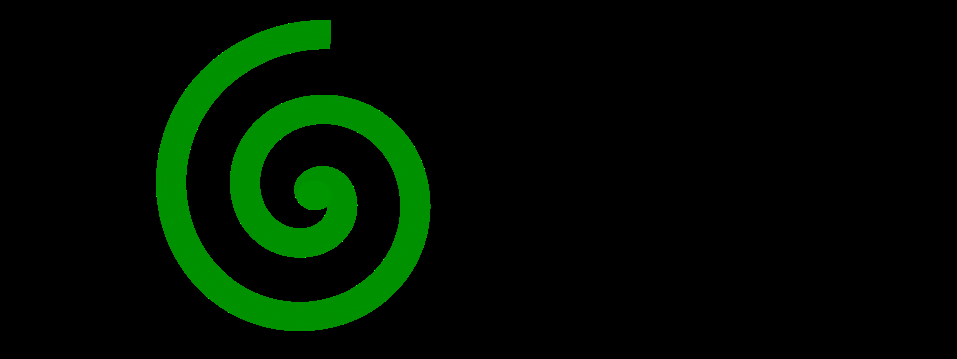

In [ ]:
from google.colab.patches import cv2_imshow
import cv2 

img = cv2.imread("image.png")
cv2_imshow(img)

In [ ]:
import os
import ivy
import kornia
import jax.numpy as jnp

# set the API key
os.envrion["IVY_API_KEY"] = ""

# load image into jax 
img = jnp.array(cv2.imread('image.png'))/255
img = jnp.expand_dims(jnp.transpose(img, (2, 0, 1)), 0)

# transpile function lazily
canny = ivy.transpile(kornia.feature.canny,to='jax')

cv2_imshow(canny(img))

In [ ]:
import tensorflow as tf
# load image in tensorflow
original_img = tf.array(cv2.imread('image.png'))/255
original_img = tf.expand_dims(tf.transpose(img, (2, 0, 1)), 0)

In [ ]:
#@title Run transpilation in eager/lazy mode { display-mode: "form" }
import torch 
mode = "Lazy" #@param ["Eager", "Lazy"]
fn_args = (original_img,) if mode == "Eager" else None

@ivy.transpile(to="tensorflow",args=fn_args)
def dilate_edges(img):
  edges = kornia.filters.canny(img)[1]
  return kornia.morphology.dilation(edges,torch.ones(7,7))


%%time
new_img = dilate_edges(original_img)

You selected Eager


In [ ]:
cv2_imshow(new_img)

### 2. Transpile Libraries 📚



In [ ]:
# transpile module lazily
kornia = ivy.transpile(kornia,to="tensorflow")

def dilate_edges(img):
  edges = kornia.filters.canny(img)[1]
  return kornia.morphology.dilation(edges,torch.ones(7,7))

%%time
new_img = dilate_edges(original_img)


In [ ]:
cv2_imshow(img)

### 3. Transpile Models 🌐

In [ ]:
import haiku as hk

num_classes = 10
hk_model = hk.nets.ResNet18(num_classes)

# transpile to framework of your choice
torch_model = ivy.transpile(hk_model,to=torch.nn.Module)
keras_model = ivy.transpile(hk_model,to=tf.keras.Model)

In [ ]:
# visualize function counting as in the odsc talk